In [59]:
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow import keras

In [60]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [95]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=3, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [96]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_125 (Conv2D)         (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_89 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_126 (Conv2D)         (None, 14, 14, 128)       73856     
                                                                 
 conv2d_127 (Conv2D)         (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_90 (MaxPooli  (None, 7, 7, 128)         0         
 ng2D)                                                           
                                                                 
 flatten_33 (Flatten)        (None, 6272)            

In [87]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
1719/1719 [==============================] - 14s 6ms/step - loss: 0.6669 - accuracy: 0.7692 - val_loss: 0.3787 - val_accuracy: 0.8720
Epoch 2/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5305 - accuracy: 0.8224 - val_loss: 0.3028 - val_accuracy: 0.8916
Epoch 3/100
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4747 - accuracy: 0.8396 - val_loss: 0.2971 - val_accuracy: 0.8994
Epoch 4/100
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4352 - accuracy: 0.8533 - val_loss: 0.2871 - val_accuracy: 0.8998
Epoch 5/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4009 - accuracy: 0.8653 - val_loss: 0.2782 - val_accuracy: 0.9056
Epoch 6/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3791 - accuracy: 0.8718 - val_loss: 0.2602 - val_accuracy: 0.9086
Epoch 7/100
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3677 - accuracy: 0.8760 - val_loss: 0.2696 -

KeyboardInterrupt: ignored

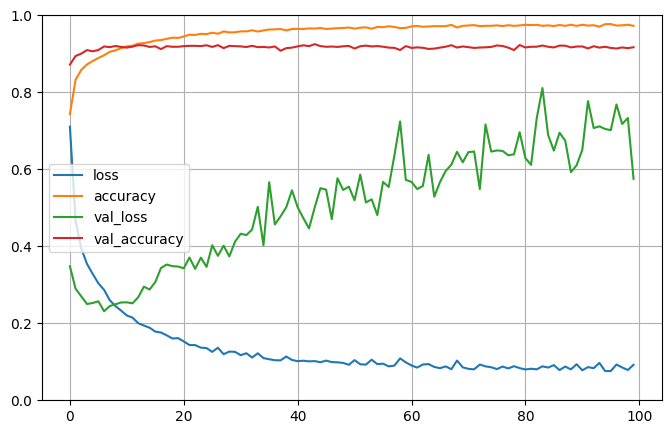

In [76]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [77]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6762 - accuracy: 0.9115
